<a href="https://colab.research.google.com/github/sarfraz079/codexcue.projects/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sns.load_dataset("titanic" )

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df=sns.load_dataset("titanic")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# age groups

In [19]:
age_group = pd.cut(df['age'], bins=[0, 18, 35, 60, 100],
                           labels=['Child', 'Young Adult', 'Adult', 'Senior'])
print(df['age_group'])

0      Young Adult
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887    Young Adult
888            NaN
889    Young Adult
890    Young Adult
Name: age_group, Length: 891, dtype: category
Categories (4, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior']


# survival by age group

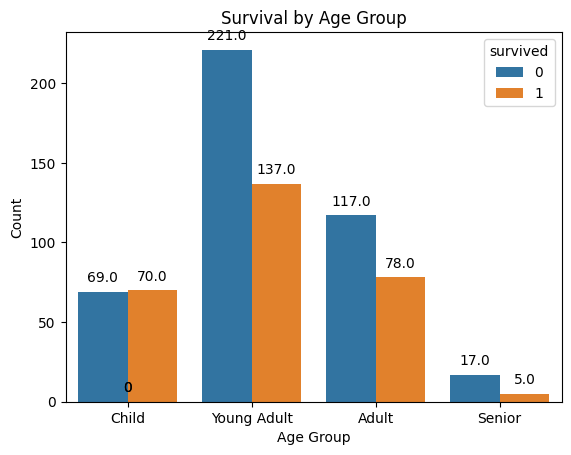

In [67]:
# Visualize survival by age group
sns.countplot(data=df, x="age_group", hue="survived")
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# survival rate by age group

In [21]:
servival_rate_by_age_group = df.groupby('age_group')['survived'].mean()
print(servival_rate_by_age_group)

age_group
Child          0.503597
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: survived, dtype: float64


<ipython-input-21-e5098a8b53bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  servival_rate_by_age_group = df.groupby('age_group')['survived'].mean()


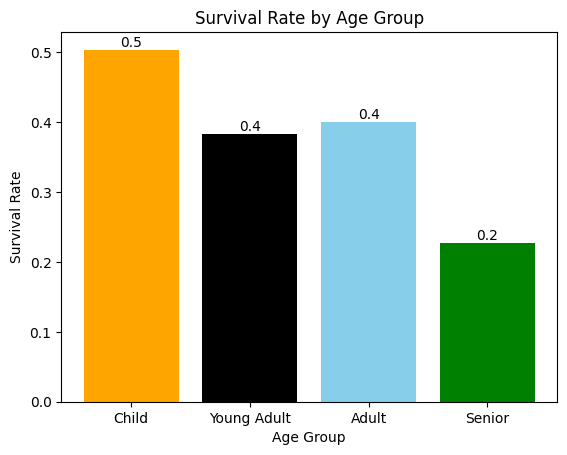

In [65]:
plt.bar(servival_rate_by_age_group.index, servival_rate_by_age_group.values, color=['orange','black','skyblue', 'green'])
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
for i, v in enumerate(servival_rate_by_age_group.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
plt.show()

In [10]:
df.groupby('sex')['survived'].count()

,survived
sex,
female,314
male,577


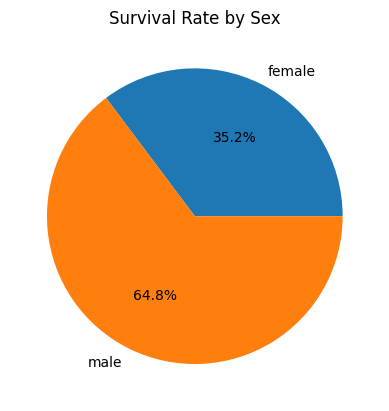

In [29]:
plt.pie(df.groupby('sex')['survived'].count(), labels=df.groupby('sex')['survived'].count().index, autopct='%1.1f%%')
plt.title("Survival Rate by Sex")
plt.show()

# Survival Rate by Passenger Class

In [32]:
survival_rate_by_class = df.groupby('pclass')['survived'].mean()
print(survival_rate_by_class)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


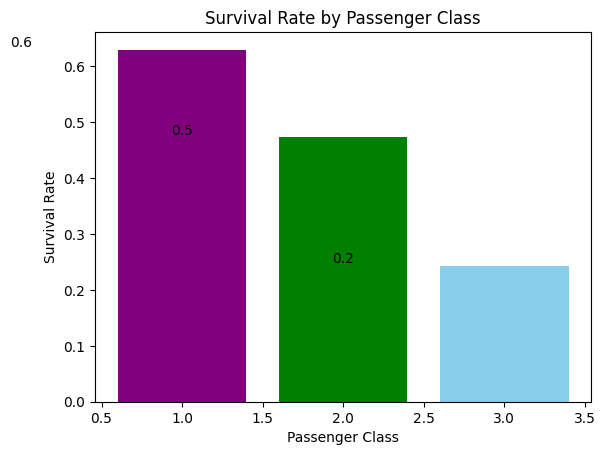

In [64]:
plt.bar(survival_rate_by_class.index, survival_rate_by_class.values, color=['purple', 'green', 'skyblue'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
for i, v in enumerate(survival_rate_by_class.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
plt.show()

# survival by alone

In [39]:
survival_rates_by_alone = df.groupby('alone')['survived'].mean()
print(survival_rates_by_alone)

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64


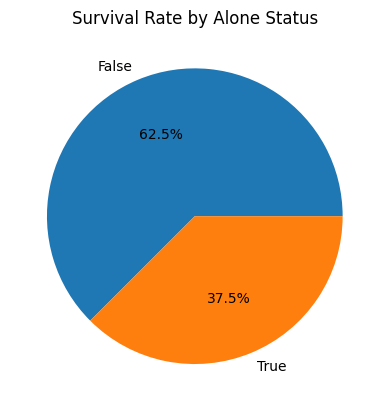

In [41]:
plt.pie(survival_rates_by_alone, labels=survival_rates_by_alone.index, autopct='%1.1f%%')
plt.title("Survival Rate by Alone Status")
plt.show()

In [42]:
df.groupby('who')['survived'].count()

,survived
who,
child,83
man,537
woman,271


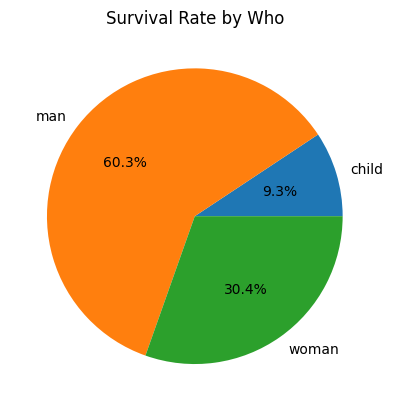

In [43]:
plt.pie(df.groupby('who')['survived'].count(), labels=df.groupby('who')['survived'].count().index, autopct='%1.1f%%')
plt.title("Survival Rate by Who")
plt.show()

# fare by class

In [44]:
average_fare_by_class = df.groupby('pclass')['fare'].mean()
print(average_fare_by_class)

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


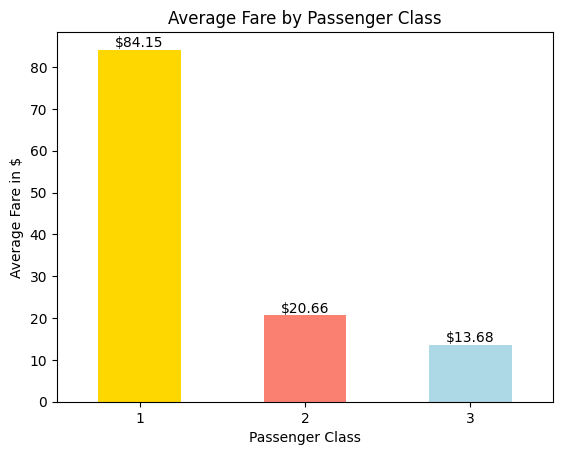

In [62]:
average_fare_by_class.plot(kind='bar', color=['gold', 'salmon', 'lightblue'])
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare in $")
plt.xticks(rotation=0)
for i, v in enumerate(average_fare_by_class):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')
plt.show()

# survival by locations

In [48]:
survival_rates_by_embarked = df.groupby('embarked')['survived'].mean()
print(survival_rates_by_embarked)

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


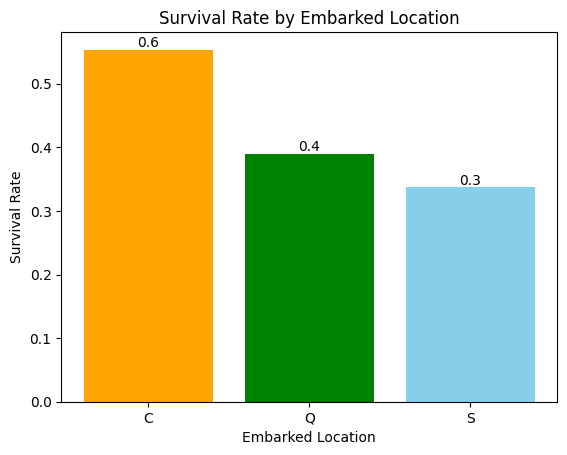

In [68]:
plt.bar(survival_rates_by_embarked.index, survival_rates_by_embarked.values, color=['orange', 'green', 'skyblue'])
plt.title("Survival Rate by Embarked Location")
plt.xlabel("Embarked Location")
plt.ylabel("Survival Rate")
for i, v in enumerate(survival_rates_by_embarked.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
plt.show()